In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat.expr.predef.pvl_iti import latent_inhib
from plotnine import *
from extn_rw_models import *

In [2]:
model = power
#model = tdrva
#model = refined
#model = revised_CompAct
save_plots = True
do_oat = False
print(model.pars)

par_vals = {'power': [0.1, 1.5, 5],
            'tdrva': [0.1, 0.05, 1.0, 5.0, 5],
            'refined': [0.01, 0.2, 0.75, 5.0],
            'revised_CompAct': [0.01, 2.0, 0.1, 8.0, 1.0, 5]}

            min   max  default
lrate_min   0.0   0.5      0.1
power       0.0   2.0      0.5
resp_scale  0.0  10.0      1.0


In [3]:
if do_oat:
    oat_result = sr.perform_oat(model = model, experiment = latent_inhib, n = 1, minimize = True)
    print(np.round(oat_result[0], 4))
    print(np.round(oat_result[1], 4))

In [4]:
print('latent inhibition \n')

trials = latent_inhib.make_trials('experimental')
ds_exp = model.simulate(trials, par_vals[model.name])

trials = latent_inhib.make_trials('control')
ds_ctl = model.simulate(trials, par_vals[model.name])

print(latent_inhib.oats['latent_inhibition'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(latent_inhib.oats['latent_inhibition'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

latent inhibition 

0.041405359386792795
       schedule     trial_name u_name  mean_resp
0       control  cs -> nothing     us   0.947109
0  experimental  cs -> nothing     us   0.905704


/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_latent_inhib_b_power.jpeg


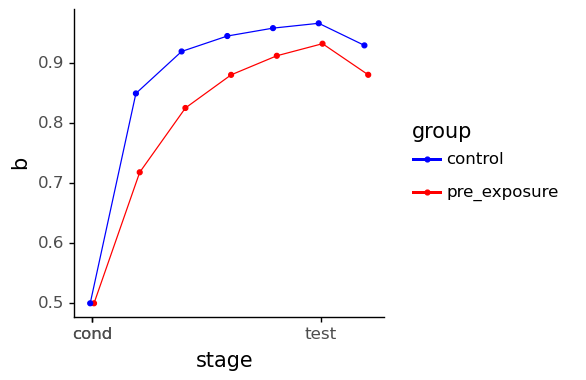

In [5]:
plot_b = sr.multi_plot([ds_exp, ds_ctl],
                       var = 'b',
                       only_main = True,
                       draw_points = True,
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'control', 'experimental': 'pre_exposure'},
                       sel = [{'t': ds_exp['stage_name'].isin(['cond', 'test'])}, {'t': ds_ctl['stage_name'].isin(['cond', 'test'])}])
plot_b += scale_color_manual(values = {'pre_exposure': 'red', 'control': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/rw_latent_inhib_b_' + model.name + '.jpeg', dpi = 500)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_latent_inhib_w_power.jpeg


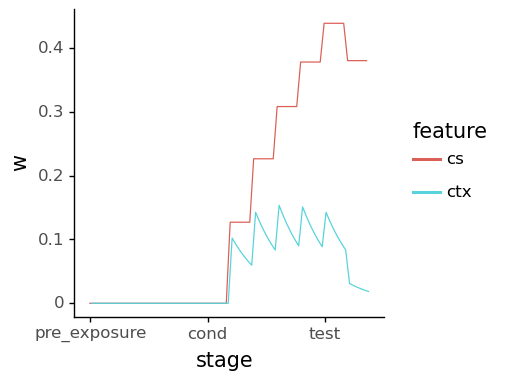

In [6]:
plot_w = sr.learn_plot(ds_exp, var = 'w', rename_coords = {'f_name': 'feature'})
plot_w + geom_hline(yintercept = 0, linetype = "dashed")
plot_w.draw()
if save_plots:
    plot_w.save(filename = 'plots/rw_latent_inhib_w_' + model.name + '.jpeg', dpi = 500)

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/rw_latent_inhib_lrate_power.jpeg


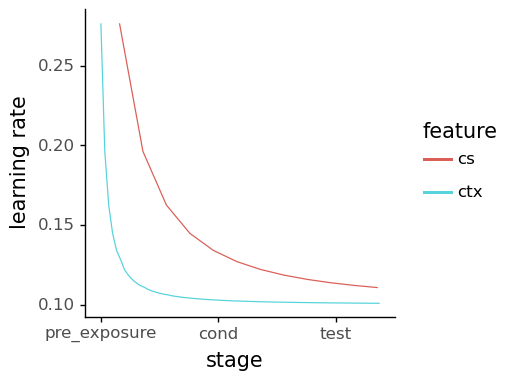

In [7]:
# Note that this only includes time steps in which the CS was present.

plot_lrate = sr.learn_plot(ds_exp, var = 'lrate',
                           drop_zeros = True,
                           rename_coords = {'f_name': 'feature'})
plot_lrate += ylab('learning rate')
plot_lrate.draw()
if save_plots:
    plot_lrate.save(filename = 'plots/rw_latent_inhib_lrate_' + model.name + '.jpeg', dpi = 500)

In [8]:
if 'atn' in ds_exp.keys():
    sr.learn_plot(ds_exp, var = 'atn').draw()
    sr.multi_plot([ds_exp, ds_ctl],
                  var = 'atn',
                  rename_coords = {'schedule': 'group', 'f_name': 'feature'},
                  sel = [{'t': ds_exp['stage_name'].isin(['cond', 'test'])}, None]).draw()